# Objective of the EDA
* Which factors determine the price of a car? 
* With what accuracy can the price be predicted?
* Can a model trained on all cars be used to accurately predict prices of models with only a few samples?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# load data

In [2]:
data_dir="../input/personal-cars-classifieds/all_anonymized_2015_11_2017_03.csv"
df=pd.read_csv(data_dir)
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


In [3]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


## Data Description

|Feature                 |Description|
|------------------------|-------------------------------------------------------------------------|
|maker                   |normalized all lowercase|
|model                   |normalized all lowercase|
|mileage                 |in KM|
|manufacture_year        |year|
|engine_displacement     |in ccm|
|engine_power            |in kW|
|body_type               |almost never present, but I scraped only personal cars, no motorcycles or utility vehicles|
|color_slug              |also almost never present|
|stk_year                |year of the last emission control|
|transmission            |automatic or manual|
|door_count              |                   |
|seat_count              |                   |
|fuel_type               |gasoline, diesel, cng, lpg, electric|
|date_created            |when the ad was scraped|
|datelastseen            |when the ad was last seen. Our policy was to remove all ads older than 60 days|
|price_eur               |list price converted to EUR|

In [5]:
datatype={
    'maker':str,
    'model':str, 
    'mileage':float, 
    'manufacture_year':float, 
    'engine_displacement':float,
    'engine_power':float, 
    'body_type':str, #almost never present
    'color_slug':str, #almost never present
    'stk_year':str, 
    'transmission':str,
    'door_count':str,
    'seat_count':str, 
    'fuel_type':str,
    'date_created':str, #ads scrap
    'date_last_seen':str,#ads last seen
    'price_eur':float #price in euro
    
}
df=pd.read_csv(data_dir,dtype=datatype)
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


In [6]:
df.describe().apply(lambda x: x.apply(lambda x:format(x)))

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3190328.0,3182334.0,2809498.0,2998035.0,3552912.0
mean,115814.00227218017,2000.8712130781998,2043.9577486796575,98.46796051413676,1625811.8688690742
std,342250.76704671263,81.72587528733025,1973.9577412984127,49.0730869593781,2025621942.6064575
min,0.0,0.0,0.0,1.0,0.04
25%,18800.0,2004.0,1400.0,68.0,1295.34
50%,86415.0,2009.0,1798.0,86.0,7364.91
75%,158025.0,2013.0,1997.0,110.0,16284.23
max,9999999.0,2017.0,32767.0,2237.0,2706149053064.4


Let's see the missing values counts

In [7]:
df.isna().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64



We can see lots of missing values are there also. We will follow some technique for handling these values. We we go througth each column.

In [8]:
df['mileage'].value_counts()

0.0         162393
10.0        107072
1.0          34690
100.0        25844
5.0          21051
             ...  
243886.0         1
243887.0         1
243889.0         1
243892.0         1
276889.0         1
Name: mileage, Length: 248142, dtype: int64

In [9]:
df["price_eur"].value_counts()

1295.34     673623
9900.00       6609
10900.00      6497
12900.00      6274
11900.00      6169
             ...  
19978.76         1
10202.07         1
18884.72         1
31003.00         1
21798.45         1
Name: price_eur, Length: 227305, dtype: int64

There are 673623 instances of price_eur where the value is exactly equal to 1295.34!

Some are really unusual data. A car with an engine power of 32k or 1 doesn't make much sense or like a car with 1 million mileage, a price of a few cents, etc

In [10]:
df = df[df["price_eur"] != 1295.34]
df = df[df["price_eur"] >= 150]


df1 = df.select_dtypes(exclude=['int', 'float'])
df1 = df1[['maker','seat_count', 'door_count', 'stk_year','transmission', 'fuel_type']]
for column in df1.columns:
    print("*"*100)
    print("Column: ", column, df1[column].unique())
    


****************************************************************************************************
Column:  maker ['ford' 'skoda' 'bmw' nan 'suzuki' 'nissan' 'opel' 'citroen' 'seat' 'kia'
 'audi' 'rover' 'toyota' 'hyundai' 'fiat' 'volvo' 'chevrolet' 'mazda'
 'jeep' 'mercedes-benz' 'subaru' 'chrysler' 'lancia' 'smart' 'honda'
 'porsche' 'dodge' 'mitsubishi' 'mini' 'jaguar' 'lexus' 'hummer' 'bentley'
 'tesla' 'maserati' 'isuzu' 'lamborghini' 'lotus' 'volkswagen' 'peugeot'
 'renault' 'alfa-romeo' 'infinity' 'rolls-royce' 'aston-martin']
****************************************************************************************************
Column:  seat_count ['7' '5' '4' 'None' '6' '9' '8' '2' '3' '1' '18' '20' '10' '11' '15' '12'
 '16' '14' '50' '17' '74' '65' '19' '54' '13' '27' '45' '24' '56' '22'
 '255' '23' '57' '25' nan '51' '55' '61' '21' '53' '26' '58' '30' '36' '0']
****************************************************************************************************
Column:  door_c

# Some feature engineering

# 1. Manufaturing year

In [11]:
new_df=df.reset_index(drop=True).copy()
#threshold value, lower value will be replaced by average value. 
min_year=1960
avg_manufacture_year=new_df.loc[new_df["manufacture_year"]>=min_year].groupby(['maker', 'model'])['manufacture_year'].mean().round().rename('avg_manufacture_year').reset_index()
avg_manufacture_year

,maker,model,avg_manufacture_year
0,alfa-romeo,145,1999.0
1,alfa-romeo,146,1998.0
2,alfa-romeo,147,2004.0
3,alfa-romeo,155,1997.0
4,alfa-romeo,156,2002.0
...,...,...,...
814,volvo,v70,2007.0
815,volvo,v90,1997.0
816,volvo,xc60,2013.0
817,volvo,xc70,2009.0


In [12]:
df_filtered=new_df.merge(avg_manufacture_year, on=['maker','model'], how='left')
df_filtered.loc[new_df['manufacture_year'] < min_year,'manufacture_year']=np.nan
df_filtered['manufacture_year']=df_filtered['manufacture_year'].fillna(df_filtered['avg_manufacture_year'])
df_filtered = df_filtered[df_filtered['manufacture_year'].notna()].reset_index(drop=True)

# 2. Engine Power 

In [13]:
min_engine_power = 50
average = df_filtered.loc[df_filtered["engine_power"] >= min_engine_power].groupby(["maker", "model", "manufacture_year"])["engine_power"].mean().round().rename("avg_engine_power").reset_index()

df_filtered2 = df_filtered.merge(average, how="left", on=["maker", "model", "manufacture_year"])
df_filtered2.loc[df_filtered["engine_power"] < min_engine_power, "engine_power"] = np.nan
df_filtered2["engine_power"] = df_filtered2["engine_power"].fillna(df_filtered2["avg_engine_power"])
df_filtered2 = df_filtered2[df_filtered2['engine_power'].notna()].reset_index(drop=True)


# 3. Engine_displacement

In [14]:
min_engine_displacement = 600
average = df_filtered2.loc[df_filtered2["engine_displacement"] >= min_engine_displacement].groupby(["maker", "model"])["engine_displacement"].mean().round().rename("avg_engine_displacement").reset_index()

df_filtered3 = df_filtered2.merge(average, how="left", on=["maker", "model"])
df_filtered3.loc[df_filtered2["engine_displacement"] < min_engine_displacement, "engine_displacement"] = np.nan
df_filtered3["engine_displacement"] = df_filtered3["engine_displacement"].fillna(df_filtered3["avg_engine_displacement"])
df_filtered3 = df_filtered3[df_filtered3['engine_displacement'].notna()].reset_index(drop=True)

# 4. Mileage

In [15]:
# Mileage
average = df_filtered3.groupby(["manufacture_year"])["mileage"].mean().round().rename("avg_mileage").reset_index()

df_filtered4 = df_filtered3.merge(average, how="left", on=["manufacture_year"]) 
df_filtered4["mileage"] = df_filtered4["mileage"].fillna(df_filtered4["avg_mileage"]).reset_index(drop=True) 

# 5. Fuel type

In [16]:
average = df_filtered4.loc[df_filtered4["fuel_type"].notna()].groupby(["maker","model"])["fuel_type"].agg(lambda x:x.value_counts().index[0]).rename("mode_fuel_type").reset_index() 

df_filtered5 = df_filtered4.merge(average, how="left", on=["maker","model"]) 
# fill nan values with the mode of fuel_type
df_filtered5["fuel_type"] = df_filtered5["fuel_type"].fillna(df_filtered5["mode_fuel_type"])
# delete of those rows that have not fuel_type valorized yet
df_filtered5 = df_filtered5[df_filtered5['fuel_type'].notna()].reset_index(drop=True) 
# get dummies variables of this categorical feature 
df_filtered5 = pd.get_dummies(df_filtered5,columns=["fuel_type"]) 
df_cleaned = df_filtered5.copy()

# 6. Ads Duration

In [17]:
df_cleaned['date_created'] = pd.to_datetime(df_cleaned['date_created']).dt.normalize()
df_cleaned['date_last_seen'] = pd.to_datetime(df_cleaned['date_last_seen']).dt.normalize()
# new feature: how much last the ad
df_cleaned['ad_duration'] = (df_cleaned['date_last_seen'] - df_cleaned['date_created']).dt.days 

# 7. seat counts

In [18]:
features_to_fillna = ["seat_count"]
for feature in features_to_fillna:
    df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors="coerce") # transform to numeric
    replace_with = df_cleaned[feature].median()                       # deduction of the median
    df_cleaned[feature].fillna(replace_with,inplace=True)             # replace null
    
df_cleaned["seat_str"] = np.select(
    condlist=[
        (df_cleaned["seat_count"] >= 0) & (df_cleaned["seat_count"] < 4),
        (df_cleaned["seat_count"] >= 4) & (df_cleaned["seat_count"] < 6),
        (df_cleaned["seat_count"] >= 6)],
    choicelist=[
        "small",
        "medium",
        "large",
        ],
    default="unknown")
df_cleaned = pd.get_dummies(df_cleaned,columns=["seat_str"])
df_cleaned = df_cleaned.drop(["seat_count"], axis=1)

# 8. Transmission

In [19]:
df_cleaned = df_cleaned[df_cleaned['transmission'].notna()]
df_cleaned = pd.get_dummies(df_cleaned,columns=["transmission"])

In [20]:
# drop features
features_to_drop = ["model", "door_count", "body_type", "color_slug", "stk_year", "avg_manufacture_year", "date_created", 
                    "date_last_seen", "avg_engine_displacement","avg_engine_power","avg_mileage", "mode_fuel_type"]
df_cleaned = df_cleaned.drop(features_to_drop, axis="columns")

In [21]:
df_cleaned.isna().sum()

maker                  213268
mileage                     0
manufacture_year            0
engine_displacement         0
engine_power                0
price_eur                   0
fuel_type_diesel            0
fuel_type_gasoline          0
ad_duration                 0
seat_str_large              0
seat_str_medium             0
seat_str_small              0
transmission_auto           0
transmission_man            0
dtype: int64

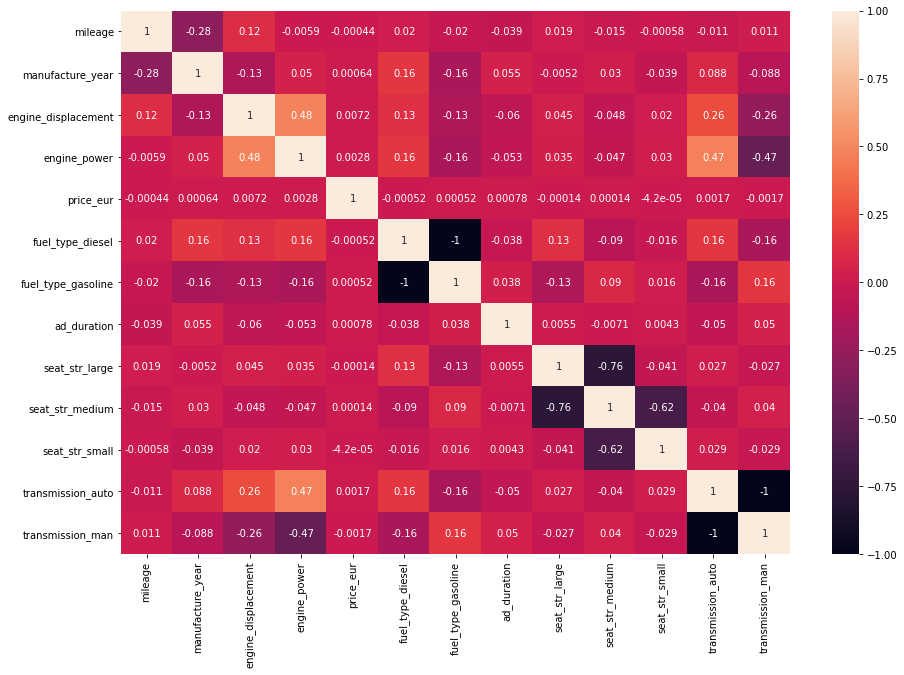

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_cleaned.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, )

# Dealing with missing values in Categorical Features
We have now only one categorical feature maker left whose missing value is to be filled.

Different Methods for dealing missing values in categorical features

* Delete the entire column maker.
* Replace missing values with the most frequent values.
* Delete rows with null values.
* Predict the missing values with classifiers.
* We will use the method "Predicting missing values with RandomForestClassifier"

# 9. Maker

In [23]:
df_with_maker = df_cleaned[df_cleaned['maker'].notna()]
print("Number of rows with maker not null:", df_with_maker.shape[0])

df_no_maker = df_cleaned[df_cleaned['maker'].isna()]
print("Number of rows with maker null:", df_no_maker.shape[0])

Number of rows with maker not null: 1690366
Number of rows with maker null: 213268


Lots of missing value, inplace of filling missing with mode or deleting that row, or deleting entire column, we will predict the missing values. Thats might save lots of information.

# Filling missing value by predicting them with one of the classifier.
RandomForestClassifier in our case.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df_with_maker.drop("maker", axis=1).values
Y = df_with_maker["maker"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

Rand_forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, 
                                max_features=0.6, min_samples_leaf=3, n_jobs=-1)

Rand_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=25, max_features=0.6, min_samples_leaf=3,
                       n_estimators=45, n_jobs=-1, random_state=False)

In [25]:

y_pred_train = Rand_forest.predict(X_train)
y_pred = Rand_forest.predict(X_test)

y_pred_proba = Rand_forest.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))


ACCURACY: TRAIN=0.9420 TEST=0.8955
LOG LOSS: 0.3388511286173819


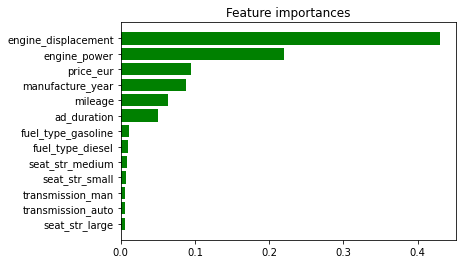

In [26]:
importances = Rand_forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_maker.iloc[:, 1:].columns[indices])
# plt.ylim([-1, len(indices)])
plt.gca().invert_yaxis()

In [27]:
df_no_maker = df_no_maker.drop('maker', axis=1)
prediction = Rand_forest.predict(df_no_maker)

df_no_maker.insert(0, 'maker', prediction)

In [28]:
frames = [df_with_maker, df_no_maker]
df_final = pd.concat(frames)
print(df_final.shape[0])

1903634


In [29]:
df_final

,maker,mileage,manufacture_year,engine_displacement,engine_power,price_eur,fuel_type_diesel,fuel_type_gasoline,ad_duration,seat_str_large,seat_str_medium,seat_str_small,transmission_auto,transmission_man
0,ford,151000.0,2011.0,2000.0,103.0,10584.75,1,0,74,1,0,0,0,1
1,skoda,143476.0,2012.0,2000.0,81.0,8882.31,1,0,74,0,1,0,0,1
2,bmw,97676.0,2010.0,1995.0,85.0,12065.06,1,0,74,0,1,0,0,1
3,skoda,111970.0,2004.0,1200.0,63.0,2960.77,0,1,74,0,1,0,0,1
4,skoda,128886.0,2004.0,1200.0,63.0,2738.71,0,1,74,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096046,citroen,133000.0,2007.0,1360.0,54.0,2900.00,0,1,158,0,1,0,0,1
1096047,volkswagen,124250.0,2007.0,2460.0,96.0,12850.00,1,0,158,1,0,0,0,1
1096051,skoda,10.0,2016.0,1197.0,66.0,17395.00,0,1,15,0,1,0,0,1
1096054,skoda,153139.0,2010.0,2000.0,103.0,8438.19,1,0,158,0,1,0,0,1


In [30]:
# helper function for removing outlier and ploting 
def remove_outliers(dataframe):
    '''
    return a dataframe without rows that are outliers in any column
    '''
    return dataframe\
    .loc[:, lambda df: df.std() > 0.04]\
    .loc[lambda df: (np.abs(stats.zscore(df)) < 3).all(axis=1)]

def plot_regression(Y_test, Y_pred):
    x = Y_test
    y = Y_pred

    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.plot(x, y, 'o')

    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
df_final = pd.get_dummies(df_final,columns=["maker"])
df_final = remove_outliers(df_final)
X = df_final.drop("price_eur", axis=1).values
Y = np.log1p(df_final["price_eur"].values)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=0)

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)
# mse_list=[]
# r2_score_list=[]
# mse_list.append(mean_squared_error(Y_test, Y_pred))
# r2_score_list.append(r2_score(Y_test, Y_pred))

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 0.09545860191150798
R2 score: 0.876469623814969


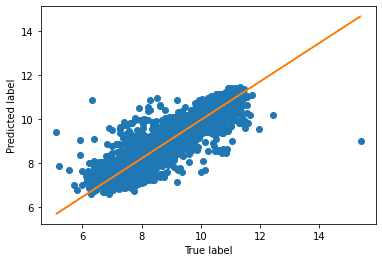

In [32]:
plot_regression(Y_test, Y_pred)